
this data is pretty simple, and even humans can read it.<br>
so we can use simple models like decision tree classifiers to analise and predict them 

In [56]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# this data is pretty simple, and even humans can read it
# so we can use simpler models like decision trees
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Decision Tree Classifier
# we can use more complex models like random forests, but they are not needed here
from sklearn.tree import DecisionTreeClassifier




plant_data = pd.read_csv('plant_disease_dataset.csv')
plant_data = plant_data.sample(frac=0.5, random_state=42) 
#print(plant_data.head())
#dark mode
sns.set_theme(style="darkgrid")


first check for null values and data, types:

In [57]:
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 6252 to 2764
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperature      5000 non-null   float64
 1   humidity         5000 non-null   float64
 2   rainfall         5000 non-null   float64
 3   soil_pH          5000 non-null   float64
 4   disease_present  5000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 234.4 KB


those don't really need precise float64 and int 64; too much data used,<br>
 plus as you can see further in this document, 5 thousand entries is not a lot

In [58]:
plant_data.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.615223,61.645464,9.623492,6.238522,0.232600
std,5.859965,22.804766,9.675983,1.306345,0.422532
min,6.558174,6.244209,0.000675,4.000810,0.000000
25%,21.844958,40.198432,2.743882,5.114460,0.000000
50%,25.235698,70.425989,6.798293,6.230677,0.000000
75%,28.861251,80.984905,13.221411,7.367214,0.000000
max,56.686495,102.395421,78.200097,8.496304,1.000000


<Axes: xlabel='temperature', ylabel='humidity'>

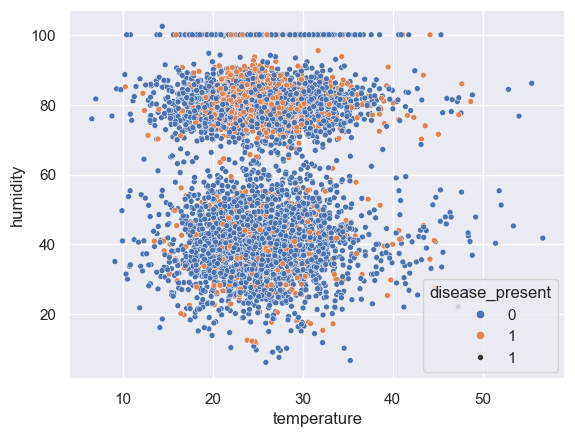

In [59]:

sns.scatterplot(
    data=plant_data,
    x='temperature',
    y='humidity',
    hue='disease_present',
    size = 1
    )


#### **Humidity and Disease Presence**

**Humidity** plays a significant role in the presence of plant disease.<br>
The scatter plot reveals **two distinct clusters** based on humidity:<br>

- **low humidity (~40%)** <br>
- and **high humidity (~80%)** <br>

The **high humidity cluster** shows a much higher rate of disease presence.<br>
This might suggests that **elevated humidity** creates favorable conditions for disease<br> 




<Axes: xlabel='soil_pH', ylabel='humidity'>

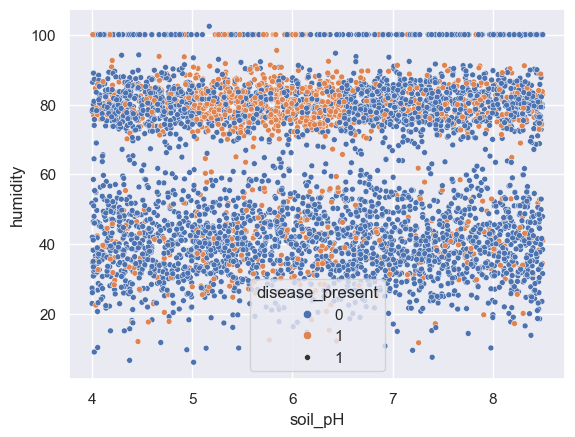

In [60]:


#@hidden_cell
#hide
sns.scatterplot(
    data=plant_data, x='soil_pH',
    y='humidity', 
    hue='disease_present',
    size = 1
    )


 - the area with ph level between **5 and 6.5** in the high humidity cluster
 - has a pretty high chance of disease presence


<Axes: xlabel='rainfall', ylabel='temperature'>

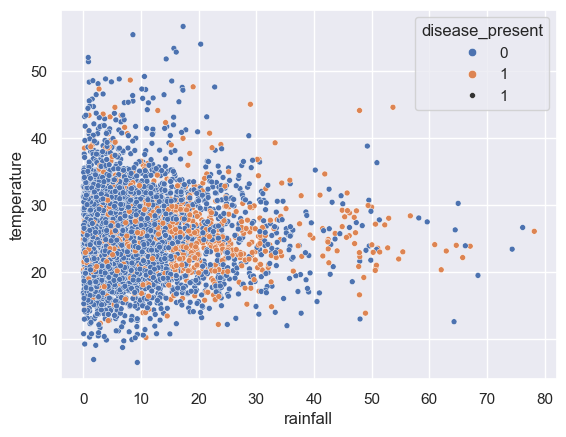

In [61]:

#different points shape for disease_present
sns.scatterplot(
    data=plant_data, 
    x='rainfall',
    y='temperature',
    hue='disease_present',
    size = 1,
)

rainfall kinda behaves similarly to humidity, <br>
sample size is small, but anything over **20mm** has high **disease** risk<br>
it's a good idea to get more data on that range.

well i think it's time to write some models, 
we'll train a decision tree classifier on the data

<Axes: >

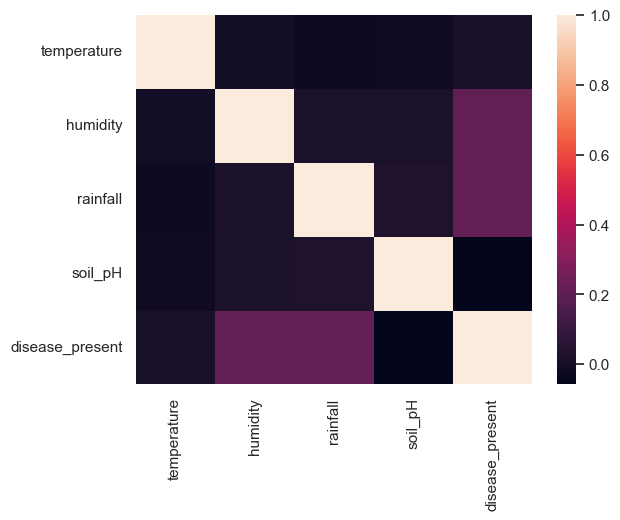

In [62]:
sns.heatmap(plant_data.corr())

those clusters don't seem to show up on corelation data, probably because the relationship is non liear 

In [66]:

#we don't even need to encode the labels, since they are already numerical
x = plant_data[['temperature', 'humidity', 'soil_pH', 'rainfall']]
y = plant_data['disease_present']

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#train a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
#predict the test set
y_pred = tree_model.predict(x_test)
#calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with decision-tree: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy with decision-tree: 0.77
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1147
           1       0.51      0.48      0.50       353

    accuracy                           0.77      1500
   macro avg       0.68      0.67      0.67      1500
weighted avg       0.77      0.77      0.77      1500



well i was wrong, this data seems to be a little tougher than i expected <br>
we're goonna need bigger guns, a **random forest** model might do the trick 

In [64]:


from sklearn.ensemble import RandomForestClassifier
better = RandomForestClassifier(random_state=42, class_weight='balanced')
better.fit(x_train, y_train)
y_pred_better = better.predict(x_test)
accuracy_better = accuracy_score(y_test, y_pred_better)
print(f'Accuracy with Random Forest: {accuracy_better:.2f}')
# print classification report
print(classification_report(y_test, y_pred_better))

Accuracy with Random Forest: 0.86
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1147
           1       0.79      0.54      0.64       353

    accuracy                           0.86      1500
   macro avg       0.83      0.75      0.78      1500
weighted avg       0.85      0.86      0.85      1500



way better results, but the model still has high false negative rates.<br>
 that's probabbly caused by the number  **infected/healtht** close to 0.3, <br>
 this inbalance may cause some problems  